<a href="https://colab.research.google.com/github/ericksanchezcorrea/Data_Science/blob/main/Proyecto-Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [98]:
data = pd.read_csv('/content/titanic.csv')

In [229]:
data.sample(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1034,3,1,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,C,NaN,NaN
276,1,0,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,B78,C,NaN,NaN,"Paris, France"


In [101]:
data.shape

(1309, 14)

In [100]:
data['sex'].value_counts()

,count
sex,
male,843
female,466


In [102]:
data['survived'].value_counts()

,count
survived,
0,809
1,500


In [103]:
data.groupby('sex').agg({'survived':['count','mean']})

survived          
          count      mean
sex                      
female      466  0.727468
male        843  0.190985

In [104]:
data['pclass'].value_counts()

,count
pclass,
3,709
1,323
2,277


In [105]:
data.groupby('pclass')['survived'].mean()

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [106]:
data.groupby('pclass')['sex'].value_counts()

pclass  sex   
1       male      179
        female    144
2       male      171
        female    106
3       male      493
        female    216
Name: count, dtype: int64

In [108]:
data.groupby('sibsp')['survived'].mean().sort_values(ascending=False)

,survived
sibsp,
1,0.510972
2,0.452381
0,0.346801
3,0.300000
4,0.136364
5,0.000000
8,0.000000


In [109]:
data.groupby('parch')['survived'].mean().sort_values(ascending=False)

,survived
parch,
3,0.625000
1,0.588235
2,0.504425
0,0.335329
4,0.166667
5,0.166667
6,0.000000
9,0.000000


In [110]:
data_by_age = data.groupby('age')['survived'].value_counts()
data_by_age.sample(3)

,,count
age,survived,
17.0,0,13
18.0,1,14
32.5,0,3


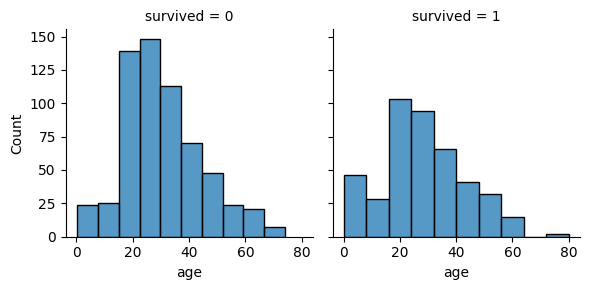

In [246]:
g = sns.FacetGrid(data, col='survived')
g.map(sns.histplot, 'age', bins=10)

Text(0.5, 1.0, 'Age histogram of non-survivors')

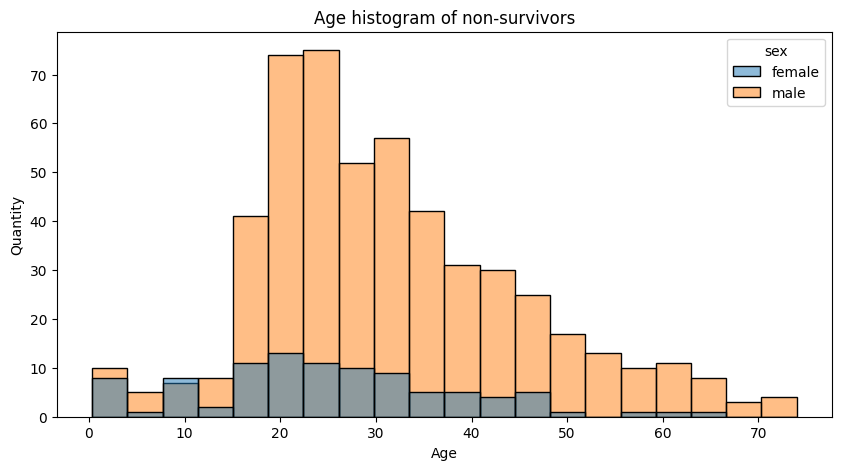

In [257]:
plt.figure(figsize=(10,5))
sns.histplot(data=data[data['survived']==0], x='age', hue='sex', bins=20, label='No survived')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Age histogram of non-survivors')

Text(0.5, 1.0, 'Age histogram of survivors')

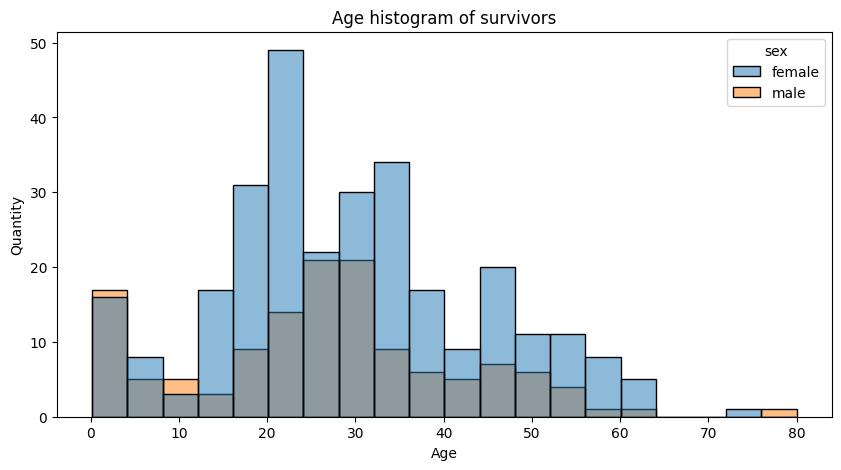

In [256]:
plt.figure(figsize=(10,5))
sns.histplot(data=data[data['survived']==1], x='age', hue='sex', bins=20, label='Survived')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Age histogram of survivors')

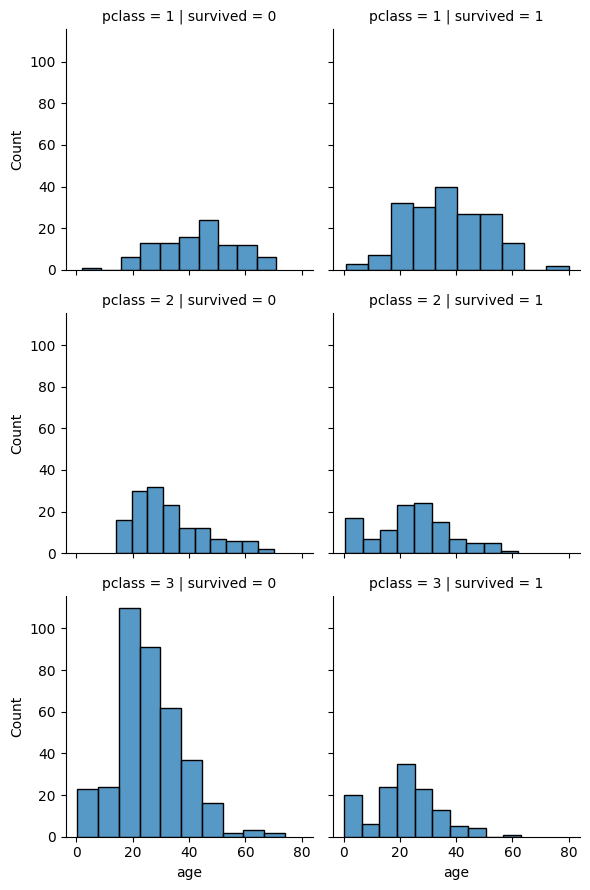

In [272]:
h_pclass = sns.FacetGrid(data=data, col='survived', row='pclass')
h_pclass.map(sns.histplot,'age', bins =10)

#Resumen
 * Hubo 1309 pasajeros: 843 hombres y 466 mujeres
 * Sobrevivieron 500 personas en total
 * Sobrevivió el 72% de las mujeres y el 19% de los hombres
 * Sobrevivió el 61% de pasajeros de 1ra clase, sobrevivió 42% de pasajeros de 2da clase, sobrevivió el 25% de pasajeros de 3ra clase.



In [274]:
## Variables categóricas
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()

one = oneHotEncoder.fit_transform(data[['sex']])
one_hot = pd.Dataframe(one.toarray)


<1309x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1309 stored elements in Compressed Sparse Row format>